
# Prerequisites

## Install python libraries

In [174]:
# !pip install pandas
# !pip install seaborn
# !pip install numpy
# !pip install regex
# !pip install matplotlib
# !pip install scipy
# !pip install PyEnchant

## Import python libraries

In [175]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy import stats
from google.colab import drive

## Import data (CSV)

In [176]:
drive.mount('/content/drive')
HOTEL_DATA_PATH = '/content/drive/MyDrive/Estudio/9 Semestre/Inteligencia Artificial II/TripAdvisor/data.csv'
HOTEL_DATA = pd.read_csv(HOTEL_DATA_PATH)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Review

In [177]:
HOTEL_DATA.head(10)

,HOTEL_NAME,HOTEL_RATING,HOTEL_PRICE,HOTEL_LOCATION,HOTEL_REVIEW_LINK,REVIEW_RATING,REVIEW_DATE,REVIEW_TEXT
0,1. Romance Istanbul Hotel,5 of 5 bubbles,"COP 1,100,014","Hudavendigar Cd. No:5 Sirkeci, Istanbul 34110 ...",https://www.tripadvisor.com//Hotel_Review-g293...,bubble_50,Date of stay: September 2022,This hotel checked off every box we had when l...
1,1. Romance Istanbul Hotel,5 of 5 bubbles,"COP 1,100,014","Hudavendigar Cd. No:5 Sirkeci, Istanbul 34110 ...",https://www.tripadvisor.com//Hotel_Review-g293...,bubble_50,Date of stay: September 2022,We turned down a 2 day free 5-star hotel offer...
2,1. Romance Istanbul Hotel,5 of 5 bubbles,"COP 1,100,014","Hudavendigar Cd. No:5 Sirkeci, Istanbul 34110 ...",https://www.tripadvisor.com//Hotel_Review-g293...,bubble_50,Date of stay: July 2022,Friendly people and great location. Shope and ...
3,1. Romance Istanbul Hotel,5 of 5 bubbles,"COP 1,100,014","Hudavendigar Cd. No:5 Sirkeci, Istanbul 34110 ...",https://www.tripadvisor.com//Hotel_Review-g293...,bubble_50,Date of stay: September 2022,Came here with my family and the location is p...
4,1. Romance Istanbul Hotel,5 of 5 bubbles,"COP 1,100,014","Hudavendigar Cd. No:5 Sirkeci, Istanbul 34110 ...",https://www.tripadvisor.com//Hotel_Review-g293...,bubble_50,Date of stay: September 2022,"This hotel is wonderful,the best assest they h..."
5,1. Romance Istanbul Hotel,5 of 5 bubbles,"COP 1,100,014","Hudavendigar Cd. No:5 Sirkeci, Istanbul 34110 ...",https://www.tripadvisor.com//Hotel_Review-g293...,bubble_50,Date of stay: September 2022,"Great hotel in old Town,clase by all the attra..."
6,1. Romance Istanbul Hotel,5 of 5 bubbles,"COP 1,100,014","Hudavendigar Cd. No:5 Sirkeci, Istanbul 34110 ...",https://www.tripadvisor.com//Hotel_Review-g293...,bubble_50,Date of stay: September 2022,"Hotel is excellent location, very near to tram..."
7,1. Romance Istanbul Hotel,5 of 5 bubbles,"COP 1,100,014","Hudavendigar Cd. No:5 Sirkeci, Istanbul 34110 ...",https://www.tripadvisor.com//Hotel_Review-g293...,bubble_50,Date of stay: September 2022,Our experience of staying at the Romance hotel...
8,1. Romance Istanbul Hotel,5 of 5 bubbles,"COP 1,100,014","Hudavendigar Cd. No:5 Sirkeci, Istanbul 34110 ...",https://www.tripadvisor.com//Hotel_Review-g293...,bubble_50,Date of stay: September 2022,We recently visited for one week and Romance i...
9,1. Romance Istanbul Hotel,5 of 5 bubbles,"COP 1,100,014","Hudavendigar Cd. No:5 Sirkeci, Istanbul 34110 ...",https://www.tripadvisor.com//Hotel_Review-g293...,bubble_50,Date of stay: September 2022,This hotel is in an excellent location. We c...


In [178]:
HOTEL_DATA.tail(10)

,HOTEL_NAME,HOTEL_RATING,HOTEL_PRICE,HOTEL_LOCATION,HOTEL_REVIEW_LINK,REVIEW_RATING,REVIEW_DATE,REVIEW_TEXT
40494,30. Concorde De Luxe Resort,4.5 of 5 bubbles,"COP 7,695,796","Yasar Sobutay Bulvari, 44, Kemeragzi, Antalya ...",https://www.tripadvisor.com//Hotel_Review-g201...,bubble_50,Date of stay: July 2012,One of the best hotels I have ever stayed in. ...
40495,30. Concorde De Luxe Resort,4.5 of 5 bubbles,"COP 7,695,796","Yasar Sobutay Bulvari, 44, Kemeragzi, Antalya ...",https://www.tripadvisor.com//Hotel_Review-g201...,bubble_50,Date of stay: July 2012,Second time in Lara beach last year delpin dev...
40496,30. Concorde De Luxe Resort,4.5 of 5 bubbles,"COP 7,695,796","Yasar Sobutay Bulvari, 44, Kemeragzi, Antalya ...",https://www.tripadvisor.com//Hotel_Review-g201...,bubble_40,Date of stay: July 2012,"Just returned from 14 night stay, family of 8 ..."
40497,30. Concorde De Luxe Resort,4.5 of 5 bubbles,"COP 7,695,796","Yasar Sobutay Bulvari, 44, Kemeragzi, Antalya ...",https://www.tripadvisor.com//Hotel_Review-g201...,bubble_40,Date of stay: July 2012,Just back having spent 2 weeks with wife and t...
40498,30. Concorde De Luxe Resort,4.5 of 5 bubbles,"COP 7,695,796","Yasar Sobutay Bulvari, 44, Kemeragzi, Antalya ...",https://www.tripadvisor.com//Hotel_Review-g201...,bubble_50,Date of stay: July 2012,We returned two days ago with a wonderful and ...
40499,30. Concorde De Luxe Resort,4.5 of 5 bubbles,"COP 7,695,796","Yasar Sobutay Bulvari, 44, Kemeragzi, Antalya ...",https://www.tripadvisor.com//Hotel_Review-g201...,bubble_50,Date of stay: July 2012,There is nothing bad to say about this hotel/ ...
40500,30. Concorde De Luxe Resort,4.5 of 5 bubbles,"COP 7,695,796","Yasar Sobutay Bulvari, 44, Kemeragzi, Antalya ...",https://www.tripadvisor.com//Hotel_Review-g201...,bubble_50,Date of stay: July 2012,I have just returned from a 2 weeks stay at th...
40501,30. Concorde De Luxe Resort,4.5 of 5 bubbles,"COP 7,695,796","Yasar Sobutay Bulvari, 44, Kemeragzi, Antalya ...",https://www.tripadvisor.com//Hotel_Review-g201...,bubble_40,Date of stay: July 2012,I have stayed at numerous 5* all inclusive res...
40502,30. Concorde De Luxe Resort,4.5 of 5 bubbles,"COP 7,695,796","Yasar Sobutay Bulvari, 44, Kemeragzi, Antalya ...",https://www.tripadvisor.com//Hotel_Review-g201...,bubble_50,Date of stay: May 2012,From the moment we arrived at the Concorde we ...
40503,30. Concorde De Luxe Resort,4.5 of 5 bubbles,"COP 7,695,796","Yasar Sobutay Bulvari, 44, Kemeragzi, Antalya ...",https://www.tripadvisor.com//Hotel_Review-g201...,bubble_50,Date of stay: June 2012,"ROOM: The room was fantastic; very modern, com..."


In [179]:
HOTEL_DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40504 entries, 0 to 40503
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   HOTEL_NAME         40504 non-null  object
 1   HOTEL_RATING       40504 non-null  object
 2   HOTEL_PRICE        40504 non-null  object
 3   HOTEL_LOCATION     40504 non-null  object
 4   HOTEL_REVIEW_LINK  40504 non-null  object
 5   REVIEW_RATING      40504 non-null  object
 6   REVIEW_DATE        40504 non-null  object
 7   REVIEW_TEXT        40504 non-null  object
dtypes: object(8)
memory usage: 2.5+ MB


The csv have 8 columns and non of the columns have null values. There are some adjustments we should do to each column:
* **HOTEL_NAME:** The first number should be eliminated from the name.
* **HOTEL_RATING:** The rating must be a integer number from 1 to 5.
* **HOTEL_PRICE:** The currency must be removed and the price should be numeric.
* **REVIEW_RATING:** The same as the "HOTEL_RATING"
* **REVIEW_DATE:** The phrase "Date of stay:" should be removed.



In [180]:
GENERAL_HOTEL_DATA = HOTEL_DATA.groupby(["HOTEL_NAME", "HOTEL_RATING","HOTEL_PRICE","HOTEL_LOCATION","HOTEL_REVIEW_LINK"]).size().reset_index(name='HOTEL_REVIEW_COUNT') # COUNT
GENERAL_HOTEL_DATA.head(30)

,HOTEL_NAME,HOTEL_RATING,HOTEL_PRICE,HOTEL_LOCATION,HOTEL_REVIEW_LINK,HOTEL_REVIEW_COUNT
0,1. Romance Istanbul Hotel,5 of 5 bubbles,"COP 1,100,014","Hudavendigar Cd. No:5 Sirkeci, Istanbul 34110 ...",https://www.tripadvisor.com//Hotel_Review-g293...,2000
1,10. Hotel Le Milie Rose,5 of 5 bubbles,"COP 1,306,211","22 rue des Petites Ecuries, 75010 Paris France",https://www.tripadvisor.com//Hotel_Review-g187...,212
2,11. Helios Costa Tropical,4.5 of 5 bubbles,"COP 286,729","Paseo de San Cristobal 12, 18690, Almunecar Spain",https://www.tripadvisor.com//Hotel_Review-g608...,506
3,12. Turin Palace Hotel,5 of 5 bubbles,"COP 971,693","Via Paolo Sacchi 8, 10128 Turin Italy",https://www.tripadvisor.com//Hotel_Review-g187...,1116
4,13. Ambassade Hotel,5 of 5 bubbles,"COP 1,507,725","Herengracht 341, 1016 AZ Amsterdam The Netherl...",https://www.tripadvisor.com//Hotel_Review-g188...,1990
5,14. Hotel Bradford Elysees - Astotel,5 of 5 bubbles,"COP 1,557,099","10, rue Saint Philippe du Roule, 75008 Paris F...",https://www.tripadvisor.com//Hotel_Review-g187...,1582
6,15. Hotel Gravina51,5 of 5 bubbles,"COP 1,401,389","Calle Gravina 51, 41001 Seville Spain",https://www.tripadvisor.com//Hotel_Review-g187...,372
7,16. Hotel Antiche Figure,5 of 5 bubbles,"COP 1,482,390","Santa Croce 687, 30135 Venice Italy",https://www.tripadvisor.com//Hotel_Review-g187...,2000
8,17. Hotel Yasmak Sultan,5 of 5 bubbles,"COP 557,592","Ebusuud Caddesi No:12 Sirkeci, Istanbul 34110 ...",https://www.tripadvisor.com//Hotel_Review-g293...,1203
9,18. Atrium Platinum Luxury Resort Hotel ...,5 of 5 bubbles,"COP 1,435,751","Illiados Street, Ixia Bay, Rhodes Town 851 00 ...",https://www.tripadvisor.com//Hotel_Review-g635...,2000


# Data Cleaning



## Common use cleaning functions

In [181]:
def clean_int(column, pattern):
    return column.replace(pattern, '', regex = True).astype(np.int64)

def clean_string(column, pattern):
    return column.replace(pattern, '', regex = True)

HOTEL_DATA = HOTEL_DATA.dropna()

## HOTEL_NAME

In [182]:
def clean_hotel_name(data):
  return data['HOTEL_NAME'].str.split('.').str[1].str[1:]

HOTEL_DATA['HOTEL_NAME'] = clean_hotel_name(HOTEL_DATA)

## HOTEL_RATING

In [183]:
def clean_hotel_rating(data):
  return data['HOTEL_RATING'].str[0].astype(np.int64)

HOTEL_DATA['HOTEL_RATING'] = clean_hotel_rating(HOTEL_DATA)

## HOTEL_PRICE

In [184]:
def clean_hotel_price(data): # 4 --> COP
  column = data['HOTEL_PRICE'].str.split('COP').str[1]
  column = column.str.replace(',','').astype(np.int64)
  return column

HOTEL_DATA['HOTEL_PRICE'] = clean_hotel_price(HOTEL_DATA)

## REVIEW_RATING

In [185]:
def clean_review_rating(data):
  return clean_int(data['REVIEW_RATING'],'[bubble_.]') / 10

HOTEL_DATA['REVIEW_RATING'] =  clean_review_rating(HOTEL_DATA)

## REVIEW_DATE

In [186]:
def clean_review_date(data): # Mientras tanto esta con year
  column = data['REVIEW_DATE'].str[14:]
  column = column.str.split(' ')
  column = column.str[1].astype(np.int64)
  return column

HOTEL_DATA['REVIEW_DATE'] = clean_review_date(HOTEL_DATA)

# Data Analysis

## General

In [187]:
HOTEL_DATA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40504 entries, 0 to 40503
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HOTEL_NAME         40504 non-null  object 
 1   HOTEL_RATING       40504 non-null  int64  
 2   HOTEL_PRICE        40504 non-null  int64  
 3   HOTEL_LOCATION     40504 non-null  object 
 4   HOTEL_REVIEW_LINK  40504 non-null  object 
 5   REVIEW_RATING      40504 non-null  float64
 6   REVIEW_DATE        40504 non-null  int64  
 7   REVIEW_TEXT        40504 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 2.8+ MB


In [188]:
HOTEL_DATA.describe()

,HOTEL_RATING,HOTEL_PRICE,REVIEW_RATING,REVIEW_DATE
count,40504.000000,4.050400e+04,40504.000000,40504.000000
mean,4.819944,1.724107e+06,4.848385,2017.909071
std,0.384239,1.514929e+06,0.481542,2.925530
min,4.000000,2.867290e+05,1.000000,2001.000000
25%,5.000000,1.099129e+06,5.000000,2016.000000
50%,5.000000,1.370004e+06,5.000000,2018.000000
75%,5.000000,1.571384e+06,5.000000,2021.000000
max,5.000000,7.695796e+06,5.000000,2022.000000


In [189]:
GENERAL_HOTEL_DATA = HOTEL_DATA.groupby(["HOTEL_NAME", "HOTEL_RATING","HOTEL_PRICE","HOTEL_LOCATION","HOTEL_REVIEW_LINK"]).size().reset_index(name='HOTEL_REVIEW_COUNT') # COUNT
GENERAL_HOTEL_DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   HOTEL_NAME          30 non-null     object
 1   HOTEL_RATING        30 non-null     int64 
 2   HOTEL_PRICE         30 non-null     int64 
 3   HOTEL_LOCATION      30 non-null     object
 4   HOTEL_REVIEW_LINK   30 non-null     object
 5   HOTEL_REVIEW_COUNT  30 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 1.5+ KB


## REVIEW_RATING

In [190]:
HOTEL_DATA.sort_values(by = ['REVIEW_RATING'], ascending = False).head()

,HOTEL_NAME,HOTEL_RATING,HOTEL_PRICE,HOTEL_LOCATION,HOTEL_REVIEW_LINK,REVIEW_RATING,REVIEW_DATE,REVIEW_TEXT
0,Romance Istanbul Hotel,5,1100014,"Hudavendigar Cd. No:5 Sirkeci, Istanbul 34110 ...",https://www.tripadvisor.com//Hotel_Review-g293...,5.0,2022,This hotel checked off every box we had when l...
25850,Elysium Hotel,5,1571384,"Queen Verenikis Street PO Box 60701, Paphos 80...",https://www.tripadvisor.com//Hotel_Review-g190...,5.0,2016,This is by far the best hotel I've ever been i...
25830,Elysium Hotel,5,1571384,"Queen Verenikis Street PO Box 60701, Paphos 80...",https://www.tripadvisor.com//Hotel_Review-g190...,5.0,2016,Living in Paphos and a short walk from the Ely...
25831,Elysium Hotel,5,1571384,"Queen Verenikis Street PO Box 60701, Paphos 80...",https://www.tripadvisor.com//Hotel_Review-g190...,5.0,2016,My wife and I spent 4 nights in Elysium Paphos...
25832,Elysium Hotel,5,1571384,"Queen Verenikis Street PO Box 60701, Paphos 80...",https://www.tripadvisor.com//Hotel_Review-g190...,5.0,2016,As I keep writing reviews for this hotel I'll ...


In [203]:
HOTEL_DATA.sort_values(by = ['REVIEW_RATING'], ascending = True).head()

,HOTEL_NAME,HOTEL_RATING,HOTEL_PRICE,HOTEL_LOCATION,HOTEL_REVIEW_LINK,REVIEW_RATING,REVIEW_DATE,REVIEW_TEXT
7357,Divan Cave Hotel,5,726447,"Aydinli Mah. Gorceli Sok. No:5, Goreme 50180 T...",https://www.tripadvisor.com//Hotel_Review-g297...,1.0,2014,I'll try to make this quick because it's a lon...
38960,Concorde De Luxe Resort,4,7695796,"Yasar Sobutay Bulvari, 44, Kemeragzi, Antalya ...",https://www.tripadvisor.com//Hotel_Review-g201...,1.0,2021,Sadly we returned to the concord to find out i...
35414,Boutique Hotel am Stephansplatz,5,1370004,"Stephansplatz 9 1010 Vienna, Vienna 1010 Austria",https://www.tripadvisor.com//Hotel_Review-g190...,1.0,2016,Will never go back! I traveled a lot and have ...
38928,Concorde De Luxe Resort,4,7695796,"Yasar Sobutay Bulvari, 44, Kemeragzi, Antalya ...",https://www.tripadvisor.com//Hotel_Review-g201...,1.0,2021,I was not very happy when we reached and the t...
5318,Conrad Istanbul Bosphorus,4,1235325,"Cihannuma Mah Saray Cd No 5, Istanbul 34353 Tu...",https://www.tripadvisor.com//Hotel_Review-g293...,1.0,2022,A lackluster check in to say the least. After ...


## HOTEL_RATING

In [192]:
GENERAL_HOTEL_DATA.sort_values(by = ['HOTEL_RATING'], ascending = True).head()

,HOTEL_NAME,HOTEL_RATING,HOTEL_PRICE,HOTEL_LOCATION,HOTEL_REVIEW_LINK,HOTEL_REVIEW_COUNT
3,Banks Mansion,4,1141364,"Herengracht 519-525, 1017 BV Amsterdam The Net...",https://www.tripadvisor.com//Hotel_Review-g188...,2000
5,Concorde De Luxe Resort,4,7695796,"Yasar Sobutay Bulvari, 44, Kemeragzi, Antalya ...",https://www.tripadvisor.com//Hotel_Review-g201...,1987
6,Conrad Istanbul Bosphorus,4,1235325,"Cihannuma Mah Saray Cd No 5, Istanbul 34353 Tu...",https://www.tripadvisor.com//Hotel_Review-g293...,2000
9,Helios Costa Tropical,4,286729,"Paseo de San Cristobal 12, 18690, Almunecar Spain",https://www.tripadvisor.com//Hotel_Review-g608...,506
19,Hotel Regent's Garden - Astotel,4,1099129,"6 rue Pierre Demours, 75017 Paris France",https://www.tripadvisor.com//Hotel_Review-g187...,800


## HOTEL_PRICE

In [193]:
GENERAL_HOTEL_DATA.sort_values(by = ['HOTEL_PRICE'], ascending = False).head()

,HOTEL_NAME,HOTEL_RATING,HOTEL_PRICE,HOTEL_LOCATION,HOTEL_REVIEW_LINK,HOTEL_REVIEW_COUNT
5,Concorde De Luxe Resort,4,7695796,"Yasar Sobutay Bulvari, 44, Kemeragzi, Antalya ...",https://www.tripadvisor.com//Hotel_Review-g201...,1987
26,"Shangri-La The Shard, London",5,3894344,"31 St Thomas Street, London SE1 9QU England",https://www.tripadvisor.com//Hotel_Review-g186...,1990
22,La Maison Favart,5,1960113,"5, Rue de Marivaux 2nd Arr, 75002 Paris France",https://www.tripadvisor.com//Hotel_Review-g187...,1376
28,The Resident Covent Garden,5,1945067,"51 Bedford Street, London WC2R 0PZ England",https://www.tripadvisor.com//Hotel_Review-g186...,1104
20,Hotel Spadai,5,1903277,"Via Dei Martelli 10, 50129, Florence Italy",https://www.tripadvisor.com//Hotel_Review-g187...,1693


## HOTEL_REVIEW_COUNTS

In [194]:
GENERAL_HOTEL_DATA.sort_values(by = ['HOTEL_REVIEW_COUNT'], ascending = False).head()

,HOTEL_NAME,HOTEL_RATING,HOTEL_PRICE,HOTEL_LOCATION,HOTEL_REVIEW_LINK,HOTEL_REVIEW_COUNT
10,Hotel Antiche Figure,5,1482390,"Santa Croce 687, 30135 Venice Italy",https://www.tripadvisor.com//Hotel_Review-g187...,2000
2,Atrium Platinum Luxury Resort Hotel & Spa,5,1435751,"Illiados Street, Ixia Bay, Rhodes Town 851 00 ...",https://www.tripadvisor.com//Hotel_Review-g635...,2000
3,Banks Mansion,4,1141364,"Herengracht 519-525, 1017 BV Amsterdam The Net...",https://www.tripadvisor.com//Hotel_Review-g188...,2000
25,Romance Istanbul Hotel,5,1100014,"Hudavendigar Cd. No:5 Sirkeci, Istanbul 34110 ...",https://www.tripadvisor.com//Hotel_Review-g293...,2000
6,Conrad Istanbul Bosphorus,4,1235325,"Cihannuma Mah Saray Cd No 5, Istanbul 34353 Tu...",https://www.tripadvisor.com//Hotel_Review-g293...,2000


# Visualization

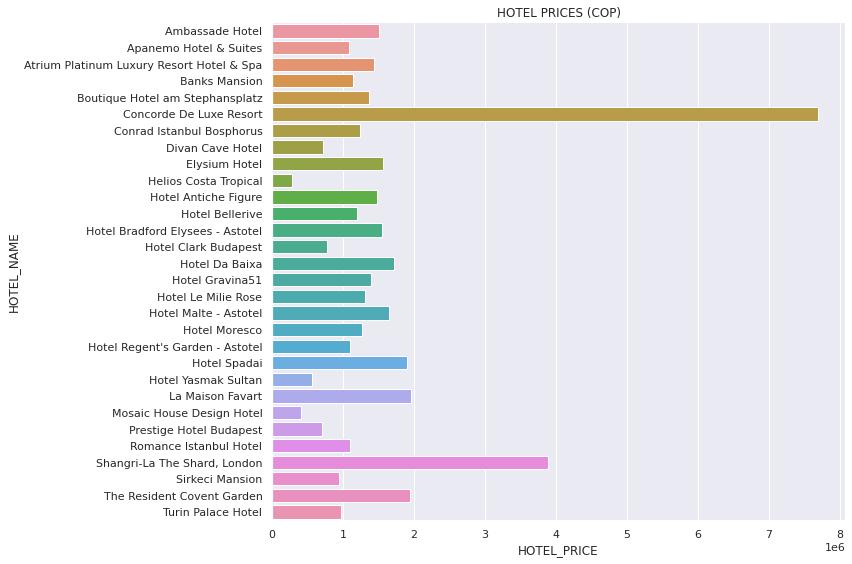

In [195]:
sns.set_palette("Set2")
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(x="HOTEL_PRICE", y="HOTEL_NAME", data=GENERAL_HOTEL_DATA.sort_values(by=['HOTEL_NAME']), estimator=np.median, capsize=.2)

sns.despine(bottom=True)
plt.title('HOTEL PRICES (COP)')
plt.tight_layout(h_pad=2)

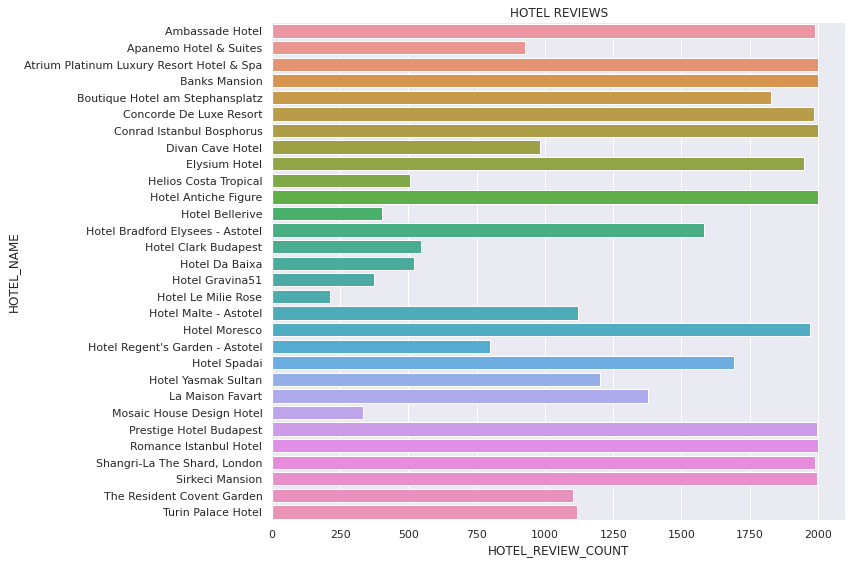

In [196]:
sns.set_palette("Set2")
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(x="HOTEL_REVIEW_COUNT", y="HOTEL_NAME", data=GENERAL_HOTEL_DATA.sort_values(by=['HOTEL_NAME']), estimator=np.median, capsize=.2)

sns.despine(bottom=True)
plt.title('HOTEL REVIEWS')
plt.tight_layout(h_pad=2)

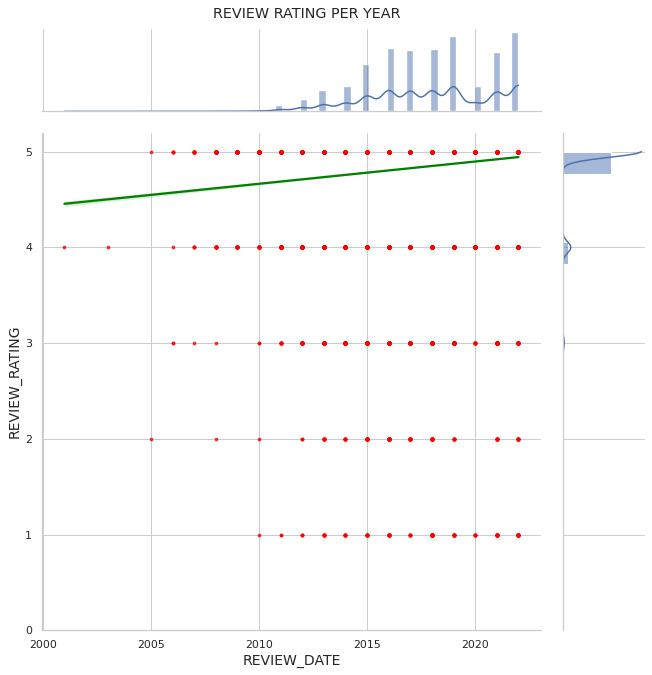

In [197]:
sns.set_theme(style="whitegrid")
plot = sns.jointplot(data = HOTEL_DATA, x = 'REVIEW_DATE', y = 'REVIEW_RATING', color='b', kind = 'reg', line_kws={'color': 'green'}, scatter_kws={'s': 7, 'color':'red'})

plot.fig.suptitle("REVIEW RATING PER YEAR")
plot.fig.tight_layout()
plot.fig.subplots_adjust(top=0.95)
plot.fig.set_size_inches(10,10)

plot.set_axis_labels('REVIEW_DATE', 'REVIEW_RATING', fontsize=14)
plot.ax_marg_y.set_ylim(bottom=0)

plt.show()

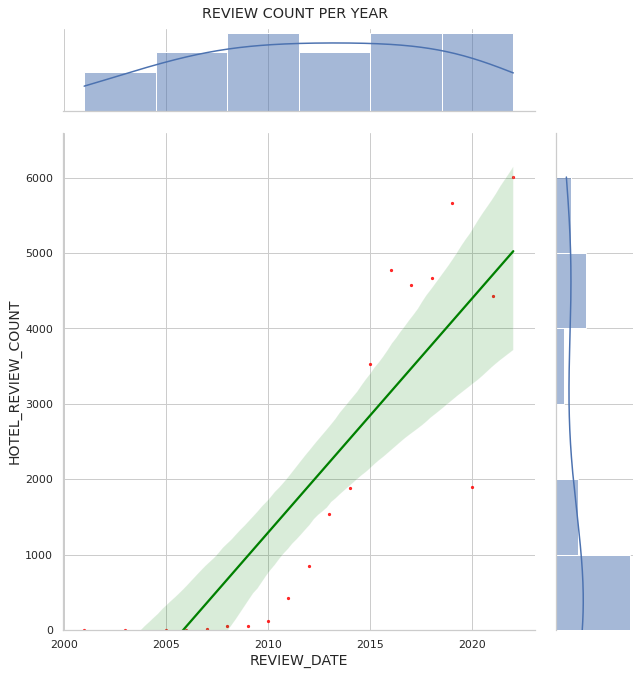

In [198]:
REVIEW_HOTEL_DATA = HOTEL_DATA.groupby(["REVIEW_DATE"]).size().reset_index(name='HOTEL_REVIEW_COUNT') # COUNT

sns.set_theme(style="whitegrid")
plot = sns.jointplot(data = REVIEW_HOTEL_DATA, x = 'REVIEW_DATE', y = 'HOTEL_REVIEW_COUNT', color='b', kind = 'reg', line_kws={'color': 'green'}, scatter_kws={'s': 5, 'color':'red'})

plot.fig.suptitle("REVIEW COUNT PER YEAR")
plot.fig.tight_layout()
plot.fig.subplots_adjust(top=0.95)
plot.fig.set_size_inches(10,10)

plot.set_axis_labels('REVIEW_DATE', 'HOTEL_REVIEW_COUNT', fontsize=14)
plot.ax_marg_y.set_ylim(bottom=0)

plt.show()

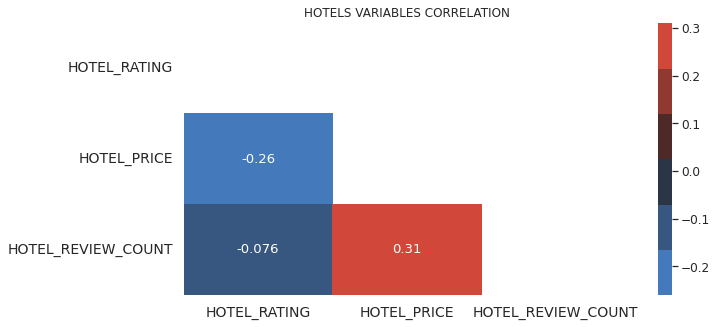

In [199]:
sns.set_theme(style="white")
fig, axs = plt.subplots(figsize = (10,5))
plt.title('HOTELS VARIABLES CORRELATION')
axs.tick_params(axis = 'y', labelsize = 14, pad = 5)
axs.tick_params(axis = 'x', labelsize = 14, pad = 5)
sns.set(font_scale = 1.1)
cmap = sns.diverging_palette(250, 15, center="dark")

corr = GENERAL_HOTEL_DATA.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap=cmap, annot = True)

plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


Text(0, -0.75, 'HOTEL PRICE DISTRIBUTION PER REVIEW RATING')

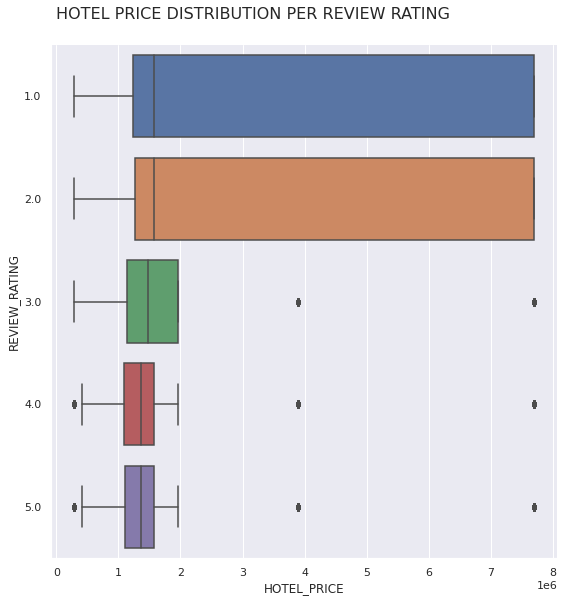

In [223]:
RATING_PRICE_HOTEL_DATA = HOTEL_DATA.copy()
RATING_PRICE_HOTEL_DATA['REVIEW_RATING'] = RATING_PRICE_HOTEL_DATA['REVIEW_RATING'].astype("category")

plot = sns.catplot(data=RATING_PRICE_HOTEL_DATA, x="HOTEL_PRICE", y="REVIEW_RATING", kind="box", height=8)
plt.text(x=0, y=-0.75, s='HOTEL PRICE DISTRIBUTION PER REVIEW RATING', fontsize=16)